In [127]:
include("./Functions.jl")
using .GPLM
using Random
using Plots
using LinearAlgebra
using Distributions
# using SpecialFunstions
gr()

Plots.GRBackend()

In [124]:
using Pkg
Pkg.add("MPFR_wrap")
using MPFR_wrap

  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]


In [254]:
# rop = BigFloat(1, precision=100)
u=BigFloat(0, precision=100)
op = BigFloat(2,precision=100)
println(op)
lngamma!(u,op)

2.0


0.0

In [169]:
gamma!(rop,op)

24.0

In [248]:
3/2

1.5

In [278]:
function StudentTDistribution(ν)
    lg1=BigFloat(1, precision=100)
    lg2=BigFloat(1, precision=100)
    lga1=BigFloat((ν+1)/2, precision=100)
    lga2=BigFloat(ν/2, precision=100)
    lngamma!(lg1, lga1)
    lngamma!(lg2, lga2)
    g=exp(lg1-lg2)
    v(t)=g*(1+(t^2)/ν)^(-lga1)/((ν*π)^(1/2))
end

TDistribution (generic function with 2 methods)

In [295]:
function lnGannmaN(n,λ)
    a=(n*(n-1)/4)*log(π)
    b=0
    for i in 1:n
        lg=BigFloat(0,precision=100)
        lga=BigFloat((λ+1/2-i/2), precision=100)
        lngamma!(lg, lga)
        b=b+lg
    end
    return(a+b)
end

lnGannmaN (generic function with 1 method)

In [334]:
function MultivariateStudentTDistribution(X,ν,M,Σ,Ω)
    d=size(X)[2]
    
    a1=lnGannmaN(n,(ν+d+n-1)/2)
    a2=-(d*n)/2*log(π)
    a3=lnGannmaN(n,(ν+n-1)/2)
    a4=(-d)/2*log(det(Σ))
    a5=(-n)/2*log(det(Ω))
    a6=(-(ν+d+n-1)/2)*log(I+inv(Σ)*(X-M)*inv(Ω)*(X-M)')
    return(exp(a1+a2+a3+a4+a5+a6))
end

MultivariateStudentTDistribution (generic function with 1 method)

In [339]:
function SEkernel(x,x_,l,sf)
    sf^2*exp(-(x-x_)'*inv(I*l^2)(x-x_)/2)
end

SEkernel (generic function with 1 method)

In [92]:
f(x)=[exp(sin(x[1])) cos(x[2])]
n(x)=[0.1 0.05]

n (generic function with 1 method)

In [93]:
d1=GPLM.ToyData(f,2,2,min=0,max=2π,messiness=n, N=100)

Main.GPLM.ToyData([3.0846734978542125 0.5493757676394432; 3.0087836406383466 5.901061515947846; … ; 3.5602810987875855 4.739498651169718; 0.3483057168029541 1.625814435024374], [1.034065449107164 0.9115946634608865; 1.173524378155735 0.9180827563274911; … ; 0.6347528370316865 0.07490832938698633; 1.5451105357942172 -0.050982961857124455])

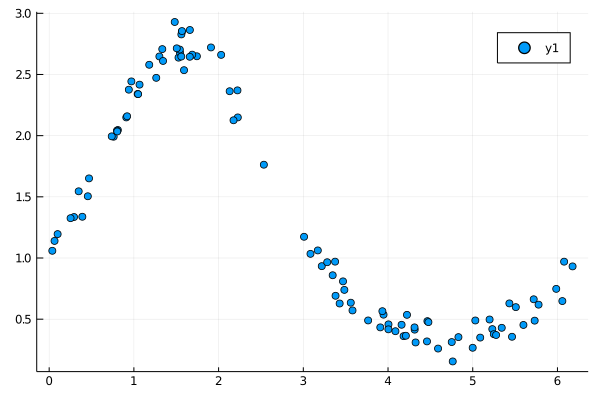

In [94]:
plot(d1.X[:,1],d1.Y[:,1],seriestype=:scatter)

In [95]:
k(x,x_,)=GPLM.GaussianKernel(x,x_,;th1=1,th2=1)

k (generic function with 1 method)

In [96]:
c1=GPLM.GaussianProcessRegression(X[:,1],Y[:,1],k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.5)

Main.GPLM.GaussianProcessRegression(Any[0.884692800424109, 1.0101092092882333, 1.1433936204303041, 1.2835795218763422, 1.4293959705579617, 1.5792174436515605, 1.73102313547571, 1.8823773953563676, 2.0304425236734303, 2.1720324735096583  …  0.4472625064420377, 0.4798147491816761, 0.5187770336253691, 0.5628315798190616, 0.6098182732659887, 0.6568551806827344, 0.7005818168994139, 0.7374938916135881, 0.764321400634494, 0.7783937977729731], Any[0.21794938820948617, 0.16760767289341705, 0.12708882200162674, 0.09538313111887853, 0.07130454833452893, 0.05375952097126069, 0.0418236649538275, 0.03466946628042311, 0.0314420459849265, 0.031176836744912118  …  0.03899254665807039, 0.03857960411950079, 0.038030691048716925, 0.03706827829582804, 0.03557937199302608, 0.034004492484613014, 0.03373832640206431, 0.03735747124122846, 0.04849092650533948, 0.07124702337387645], [1.5 0.627437066876555 … 1.5224217653648816e-5 0.00010555895968434577; 0.627437066876555 1.5 … 0.0009018785489467075 0.004125343397

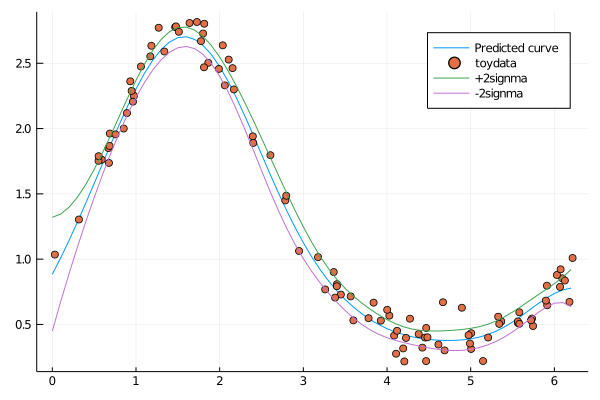

In [87]:
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
# y=[f(i) for i in x]
# plot(x,y, label="Theorcetical curve", dpi=300)
plot(x_test,c1.predictMean, label="Predicted curve")
plot!(X[:,1],Y[:,1],seriestype=:scatter, label="toydata")
plot!(x_test,c1.predictMean+2 .*c1.predictVariance, label="+2signma")
plot!(x_test,c1.predictMean-2 .*c1.predictVariance,label="-2signma")
# savefig("f1.png")

In [88]:
k(x,x_,)=GPLM.GaussianKernel(x,x_,;th1=1,th2=1)
c2=GPLM.GaussianProcessRegression(X[:,2],Y[:,2],k,x_test=[i for i in 0:0.1:2π],observationn_noise=0.5)

Main.GPLM.GaussianProcessRegression(Any[0.856640856331012, 0.8899671602606274, 0.908100304823181, 0.9099513216369922, 0.8951660123480006, 0.8641175342871309, 0.8178401801558933, 0.7579148986790236, 0.6863215738522708, 0.605275113808491  …  0.566209336932813, 0.650294921749119, 0.726269811967385, 0.7922400714377184, 0.8463639099411506, 0.8869762894115939, 0.9127299820743684, 0.9227373660591226, 0.9166934807870483, 0.8949605082510255], Any[0.12050644135827071, 0.08103997299652443, 0.056885806848458564, 0.04493666360715054, 0.04133790235844603, 0.042342091871894194, 0.04494984783514988, 0.047212147914410196, 0.04820177339039511, 0.047764004668895965  …  0.040207897959249506, 0.04247934897853389, 0.043487410580136054, 0.0427989539670971, 0.04060389645157514, 0.038043658527317836, 0.037406044019503315, 0.0420518517018279, 0.05599235386244539, 0.0831473686522538], [1.5 5.413322280567895e-6 … 0.004399344277116938 2.5239067761342866e-6; 5.413322280567895e-6 1.5 … 0.2646997138941928 0.988427328

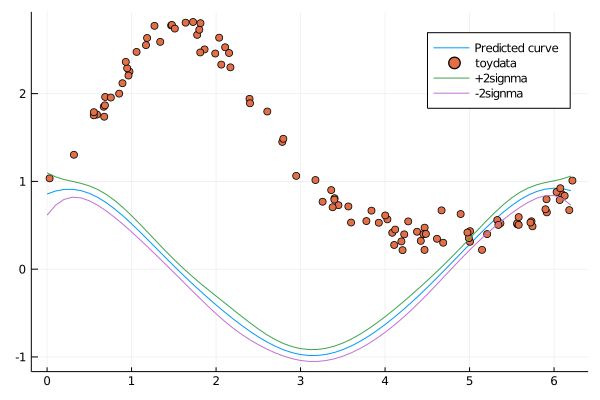

In [89]:
x_test=[i for i in 0:0.1:2π]
x=[i for i in 0:0.1:2π]
# y=[f(i) for i in x]
# plot(x,y, label="Theorcetical curve", dpi=300)
plot(x_test,c2.predictMean, label="Predicted curve")
plot!(X[:,1],Y[:,1],seriestype=:scatter, label="toydata")
plot!(x_test,c2.predictMean+2 .*c2.predictVariance, label="+2signma")
plot!(x_test,c2.predictMean-2 .*c2.predictVariance,label="-2signma")
# savefig("f1.png")

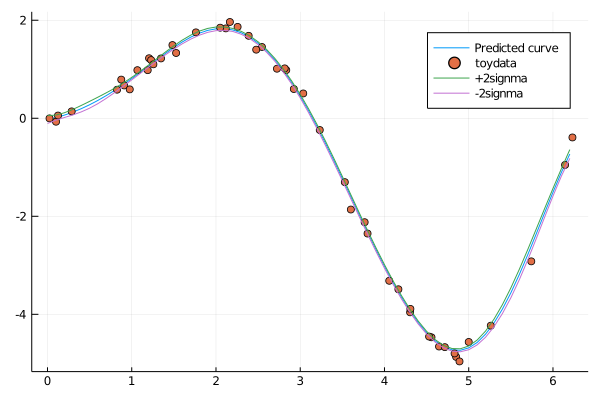

In [171]:
t(x)=x[1]*sin(x[1])
n(x)=[0.1]
d1=GPLM.ToyData(t,1,1,min=0,max=2π,messiness=n,N=50)
p1=GPLM.GaussianProcessRegression(
    d1.X,
    d1.Y,
    (x,x_,)->GPLM.GaussianKernel(x,x_,;th1=1,th2=1),
    [i for i in 0:0.1:2π],
    0.1
)
GPLM.VisualizeGPLM(p1)